In [60]:
import warnings; warnings.simplefilter('ignore')
from scpopcorn import MergeSingleCell
from scpopcorn import SingleCellData
import pandas as pd
import os

## Read in scRNA-seq row counts data

In [61]:
File1 = "data/WT_TRAF6_10X/filtered_gene_bc_matrices/mm10/wt.tsv"
Test1 = SingleCellData()
Test1.ReadData_SeuratFormat(File1)

File2 = "data/KO_TRAF6_10X/filtered_gene_bc_matrices/mm10/ko.tsv"
Test2 = SingleCellData()
Test2.ReadData_SeuratFormat(File2)

File3 = "data/PBMC/matrix.txt"
Test3 = SingleCellData()
Test3.ReadData_SeuratFormat(File3)

2880
2341
3222


## Read in ground truth cell labels (this is optional)

In [62]:
File3T = "data/PBMC/labels.txt"
Test3.ReadTurth(File3T, 0, 1)

None number is 0 


## Normlize scRNA-seq data & find Highly Variable Genes & log transform

In [63]:
Test1.Normalized_per_Cell()
Test1.FindHVG()
Test1.Log1P()

Test2.Normalized_per_Cell()
Test2.FindHVG()
Test2.Log1P()

Test3.Normalized_per_Cell()
Test3.FindHVG()
Test3.Log1P()

## Combine datasets and set number of supercells for each dataset

In [64]:
NumSuperCell_Test1 = 50
NumSuperCell_Test2 = 50
NumSuperCell_Test3 = 50
MSingle = MergeSingleCell(Test1, Test2, Test3)
MSingle.MultiDefineSuperCell(NumSuperCell_Test1,NumSuperCell_Test2, NumSuperCell_Test3)

MSingle_PBMC = MergeSingleCell(Test3)
MSingle_PBMC.MultiDefineSuperCell(NumSuperCell_Test3)

## Compute within dataset similairty and between dataset similarity

In [65]:
# ERROR OCCRUS
Mat_Center = MSingle.ConstructWithinSimiarlityMat_SuperCellLevel()
Mat_Between = MSingle.ConstructBetweenSimiarlityMat_SuperCellLevel()

Mat_Center_PBMC = MSingle_PBMC.ConstructWithinSimiarlityMat_SuperCellLevel()
Mat_Between_PBMC = MSingle_PBMC.ConstructBetweenSimiarlityMat_SuperCellLevel()

13360
13277
12510
4008
3982
1501
13360
33694
10543
4008
10107
1628
13277
33694
10483
3982
10107
1630


## SDP solver

In [66]:
Estimate_NumCluster = 10 # initial guess of number of corresponding clusters, do not need to be accurate!!!
MSingle.SDP_NKcut(Estimate_NumCluster)

MSingle_PBMC.SDP_NKcut(Estimate_NumCluster)

/Users/ericasuh/miniconda3/envs/sc-env-2/lib/python3.8/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/Users/ericasuh/miniconda3/envs/sc-env-2/lib/python3.8/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


optimal value with SCS: 4.9115437298060165
optimal value with SCS: 10.00000604479076


/Users/ericasuh/miniconda3/envs/sc-env-2/lib/python3.8/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/Users/ericasuh/miniconda3/envs/sc-env-2/lib/python3.8/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


## Rounding & Automatically estimate number of clusters

In [67]:
NumCluster_Min = 3 
NumCluster_Max = 20
# PopCorn will screen number of cluster from NumCluster_Min to NumCluster_Max and find the best number of clusters
CResult = MSingle.NKcut_Rounding(NumCluster_Min, NumCluster_Max)
CResult_PBMC = MSingle_PBMC.NKcut_Rounding(NumCluster_Min, NumCluster_Max)

/Users/ericasuh/miniconda3/envs/sc-env-2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Evaluation of clustering results if ground truth is provided

In [68]:
MSingle_PBMC.Evaluation(CResult_PBMC)

['B', 'CD4+', 'Cytotoxic', 'Megakaryocyte', 'CD16+', 'CD14+', 'Dendritic', 'Natural']
['B', 'CD4+', 'Cytotoxic', 'Megakaryocyte', 'CD16+', 'CD14+', 'Dendritic', 'Natural']
###########Corresponding Clusterin 0##########
>Dataset 0
Number of Cells: 100
26.000000% percentage of cells are Cytotoxic
74.000000% percentage of cells are CD4+
unique cluster is ['CD4+']
###########Corresponding Clusterin 1##########
>Dataset 0
Number of Cells: 3015
1.260365% percentage of cells are Dendritic
3.250415% percentage of cells are CD16+
6.434494% percentage of cells are Natural
8.955224% percentage of cells are Megakaryocyte
11.475954% percentage of cells are B
11.741294% percentage of cells are CD14+
25.970149% percentage of cells are CD4+
30.912106% percentage of cells are Cytotoxic
unique cluster is ['Cytotoxic']
###########Corresponding Clusterin 2##########
>Dataset 0
Number of Cells: 107
3.738318% percentage of cells are Cytotoxic
96.261682% percentage of cells are CD4+
unique cluster is ['CD4+'

/Users/ericasuh/miniconda3/envs/sc-env-2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Similairty between cells across datasets

In [69]:
MSingle.StatResult()

Similairty between cells across datasets of Cluster 0 is 0.314799
Similairty between cells across datasets of Cluster 1 is 2.359983
Similairty between cells across datasets of Cluster 2 is 0.910644
Cluster 3 is an unique cluster


## Umap plots using the results generated by scPopCorn

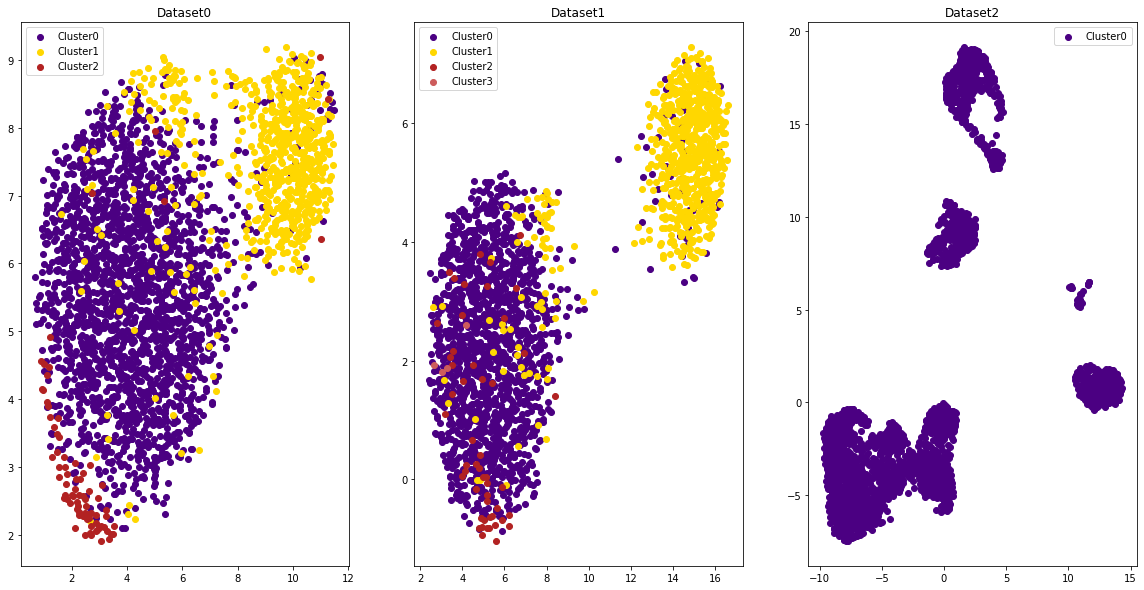

array([<AxesSubplot:title={'center':'Dataset0'}>,
       <AxesSubplot:title={'center':'Dataset1'}>,
       <AxesSubplot:title={'center':'Dataset2'}>], dtype=object)

In [70]:
MSingle.Umap_Result()

/Users/ericasuh/miniconda3/envs/sc-env-2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: 'AxesSubplot' object is not subscriptable

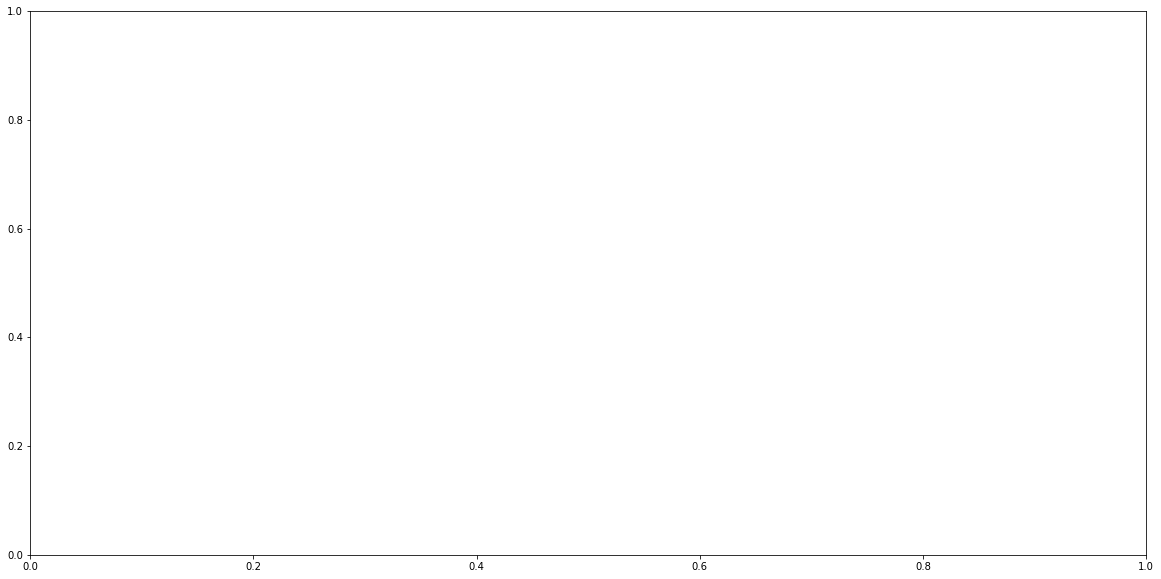

In [71]:
MSingle_PBMC.Umap_Result()

## Output PopCorn results into a file

In [72]:
FileName = "scPopCorn_output.txt"
MSingle.OutputResult(FileName)

[1 1 1 1 1 1 1 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 3 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
2880
2341
3222


/Users/ericasuh/miniconda3/envs/sc-env-2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
